In [1]:
import keras,pandas as pd,os
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
# from keras.optimizers import SGD
from keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers
# from tensorflow_addons.optimizers import AdamW
# from keras.optimizers import SGD,Adamax,RMSprop,Adam
from tensorflow.keras.optimizers import SGD,Adamax,RMSprop,Adam,Nadam
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

In [2]:
from tensorflow.keras.optimizers import SGD,Adamax,RMSprop,Adam,Nadam

In [3]:
S_3=pd.read_csv('Sepsis3_rf_top10_cgmh_data.csv')


data_shape = S_3.shape
Seps3_x=S_3.iloc[:,1:data_shape[0]]
Seps3_y=S_3['sofa3m']

print(Seps3_x.shape[1])
print(Seps3_y.shape)
print(Seps3_x.shape)

10
(4314,)
(4314, 10)


In [4]:

from sklearn.model_selection import train_test_split
from utils.dataloader import normalized
# train_x, test_x, train_y, test_y = train_test_split(Seps3_x,Seps3_y,test_size = 0.25, random_state = 1234, stratify =Seps3_y)

In [5]:
Seps3_x.shape

(4314, 10)

In [6]:
S_3_test=pd.read_csv('Sepsis3_rf_top10_cgmh_data_test.csv')
S_3_train=pd.read_csv('Sepsis3_rf_top10_cgmh_data_train.csv')


In [7]:
S_3_test.shape


(1078, 11)

In [8]:
S_3_train.shape

(3236, 11)

In [9]:
test_x = S_3_test.iloc[:,1:data_shape[0]]
test_x.shape

(1078, 10)

In [10]:
train_x = S_3_train.iloc[:,1:data_shape[0]]
train_x.shape

(3236, 10)

In [11]:
test_y=S_3_test['sofa3m']
train_y=S_3_train['sofa3m']

In [12]:
test_y

0       1
1       1
2       1
3       1
4       1
       ..
1073    0
1074    0
1075    0
1076    0
1077    0
Name: sofa3m, Length: 1078, dtype: int64

In [13]:


print(train_y.shape)
print(train_x.shape)
print(test_y.shape)
print(test_x.shape)
print(sum(test_y))

(3236,)
(3236, 10)
(1078,)
(1078, 10)
134


In [14]:
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [15]:
from utils.model import best_model

Epoch 1/300
25/25 [==============================] - 0s 7ms/step - loss: 0.4212 - accuracy: 0.8345 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8757 - val_loss: 6.0702e-10 - val_accuracy: 1.0000
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8819 - val_loss: 3.6488e-04 - val_accuracy: 1.0000
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8839 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8788 - val_loss: 0.0472 - val_accuracy: 0.9969
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.8877 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8877 - val_loss: 0.0959 - val_accuracy: 0.9784
E

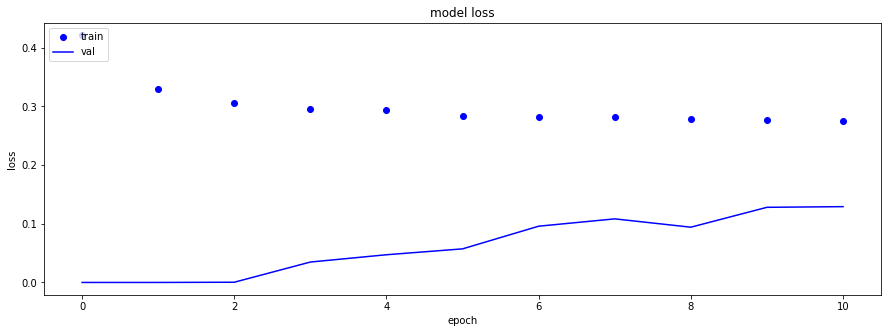

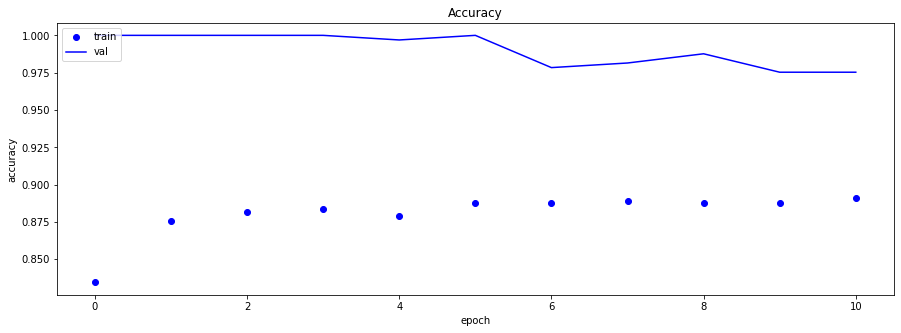

In [16]:
model_best = best_model(train_x, test_x, train_y, test_y,input_shape=10, 
                        batch=120,epoch=300,lr=0.1,decay=0.1,momentum=0.8,af='relu',
                        units_L=2,dropout=0.1,units_num=50,warm_up=0)

In [17]:
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)

In [18]:
_,accuracy_tr = model_best.evaluate(train_x, train_y,verbose=0)
_,accuracy_te = model_best.evaluate(test_x, test_y,verbose=0)

In [19]:
accuracy_tr

0.9088380932807922

In [20]:
accuracy_te

0.9025974273681641

In [21]:
auc_tr=roc_auc_score(train_y, yhat_probs_train)
auc_te=roc_auc_score(test_y, yhat_probs_test)


In [22]:
auc_tr

0.8811854967276389

In [23]:
auc_te

0.8866762585378194

In [24]:
r0=pd.DataFrame([accuracy_tr, accuracy_te,auc_tr,auc_te])



In [26]:
df1 = pd.DataFrame(r0.T)

In [27]:
df1.columns = ['Train accuracy', 'Test accuracy', 'Train AUC' ,'Test AUC']

In [28]:
df1

,Train accuracy,Test accuracy,Train AUC,Test AUC
0,0.908838,0.902597,0.881185,0.886676


In [33]:

import numpy as np

In [34]:
predict_train=model_best.predict(train_x) 
classes_train_pred=np.argmax(predict_train,axis=1)
classes_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
predict_test=model_best.predict(test_x) 
classes_test_pred=np.argmax(predict_test,axis=1)
classes_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
train_y = pd.DataFrame(train_y)
classes_train_pred = pd.DataFrame(classes_train_pred)
yhat_probs_train = pd.DataFrame(yhat_probs_train)

In [37]:
train_result= pd.concat([train_y, classes_train_pred,yhat_probs_train], axis=1)
train_result

,sofa3m,0,0
0,1,0,0.534683
1,1,0,0.421157
2,1,0,0.564178
3,1,0,0.466127
4,1,0,0.479881
...,...,...,...
3231,0,0,0.036624
3232,0,0,0.072731
3233,0,0,0.020095
3234,0,0,0.025047


In [38]:
train_result.columns =  ['sofa3m', 'class_pred', 'prob_pred']

In [39]:
train_result.to_csv('dnn for spesis3 in cgmh train result ver2 20230222.csv')

In [40]:
test_y = pd.DataFrame(test_y)
classes_test_pred = pd.DataFrame(classes_test_pred)
yhat_probs_test = pd.DataFrame(yhat_probs_test)

In [41]:
test_result= pd.concat([classes_test_pred, classes_test_pred,yhat_probs_test], axis=1)
test_result

,0,0,0
0,0,0,0.686474
1,0,0,0.406283
2,0,0,0.486918
3,0,0,0.141734
4,0,0,0.621880
...,...,...,...
1073,0,0,0.062839
1074,0,0,0.602479
1075,0,0,0.109361
1076,0,0,0.133485


In [42]:
test_result.columns =  ['sofa3m', 'class_pred', 'prob_pred']

In [43]:
test_result.to_csv('dnn for spesis3 in cgmh test result ver2 20230222.csv')

In [45]:
from utils.visualize import visualize

(1078, 1)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
=== Accuracy ===
Accuracy (train): 0.908838
Accuracy (test): 0.902597


=== Precision ===
Precision (train): 0.724280
Precision (test): 0.666667


=== Recall ===
Recall (train): 0.435644
Recall (test): 0.432836


=== F1 score ===
F1 score (train): 0.544049
F1 score (test): 0.524887


=== Cohens Kappa ===
Cohens kappa (train): 0.496866
Cohens kappa (test): 0.473344


=== ROC AUC ===
ROC AUC for training dataset: 0.881185
ROC AUC for testing dataset: 0.886676


=== Confusion matrix for train datset ===
[[2765   67]
 [ 228  176]]


=== Confusion matrix for test datset ===
[[915  29]
 [ 76  58]]


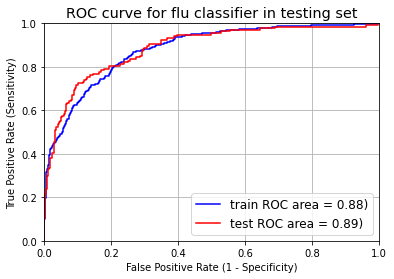

In [46]:
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)
print(yhat_probs_test.shape)
yhat_classes_train,yhat_classes_test=visualize(yhat_probs_train,yhat_probs_test,model_best,train_x,train_y,test_x,test_y)